In [12]:
import joblib
import importlib
from datetime import datetime

from snowpacktools.snowpro import snowpro, pro_plotter, instability_rfm_mayer

In [6]:
importlib.reload(pro_plotter)
pro_path = './sample-data/snowprofile22402.pro'
out_path = './sample-data/snowprofile22402_test.png'

[i]  Stacking features for Punstable RF-model (Mayer et al., 2022): 0.00917673110961914s
[i]  RF-model prediction: 0.0198976993560791s
[i]  Saving figure ./sample-data/snowprofile22402_test.png...
[i]  Visualization completed in 1.7598309516906738s


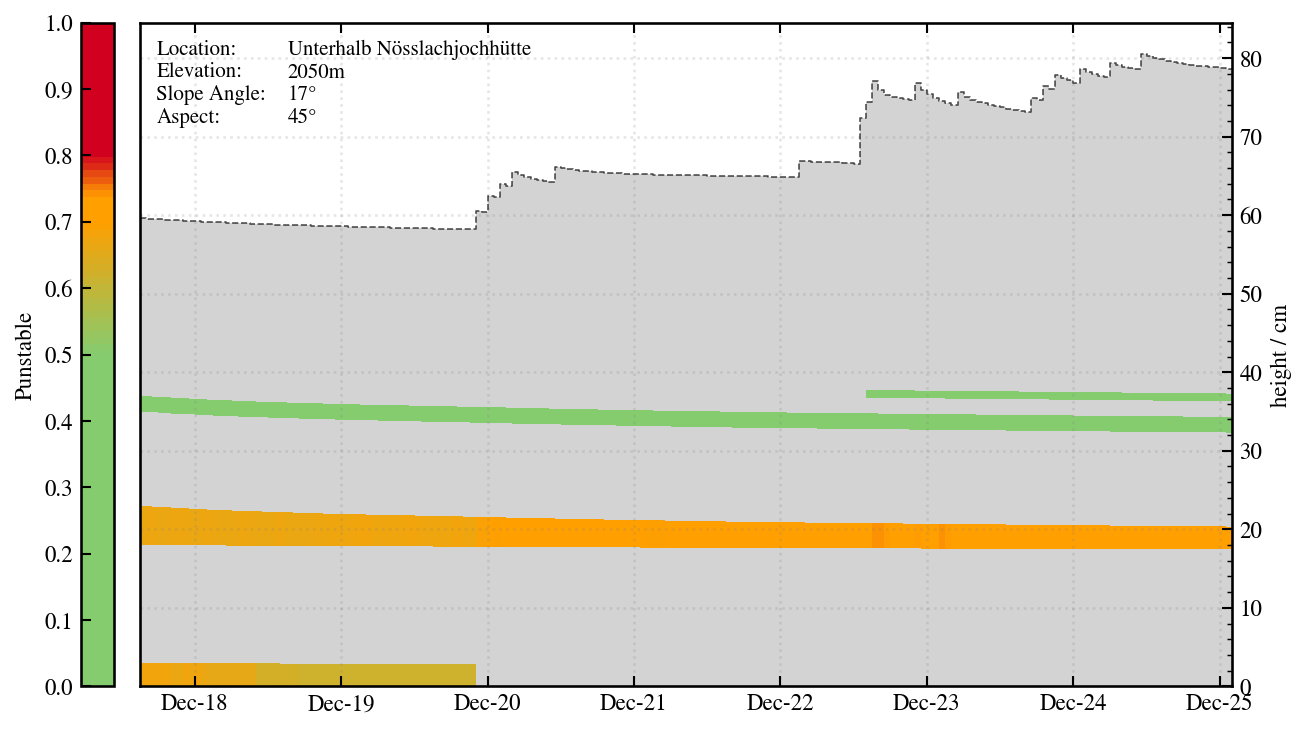

In [7]:
"""Plot snowpack evolution"""
var = "Punstable"
pro_plotter.snp_evo(pro_path, out_path=out_path, var=var)

[i]  Timestamp 2024-12-22 23:00:00 not found instead using 2024-12-22 23:03:00.
[i]  Saving figure ./sample-data/snowprofile22402_test.png...
[i]  Visualization completed in 0.6929781436920166s


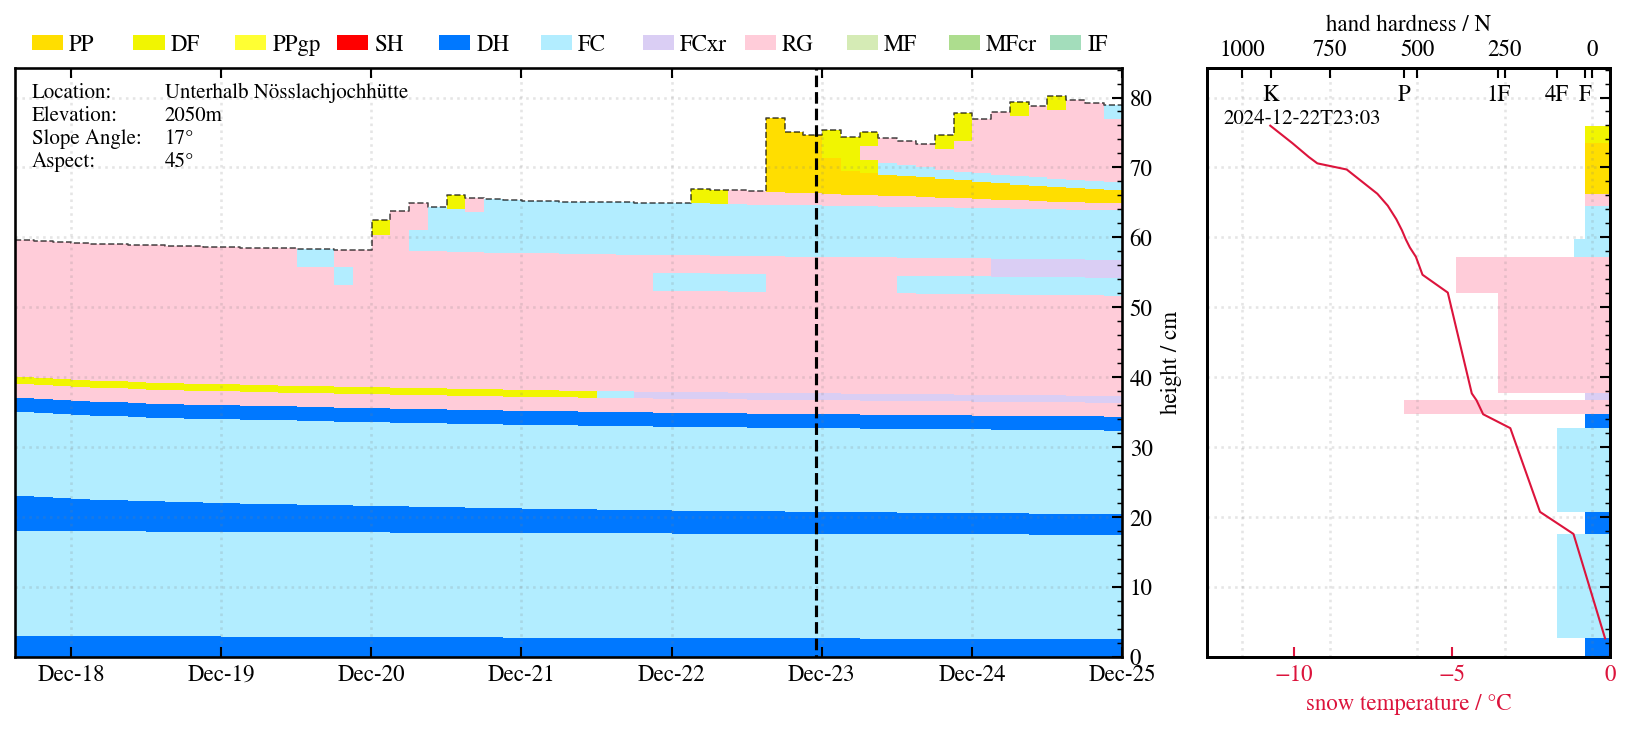

In [8]:
"""Plot snowpack evolution and profile"""
datetime_str = "2024-12-22T23:00"
pro_plotter.snp_evo(pro_path,out_path=out_path, DATETIME_STR=datetime_str, res="3h")

[i]  Timestamp 2024-12-22 23:00:00 not found instead using 2024-12-22 23:03:00.
[i]  Saving figure ./sample-data/snowprofile22402_test.png


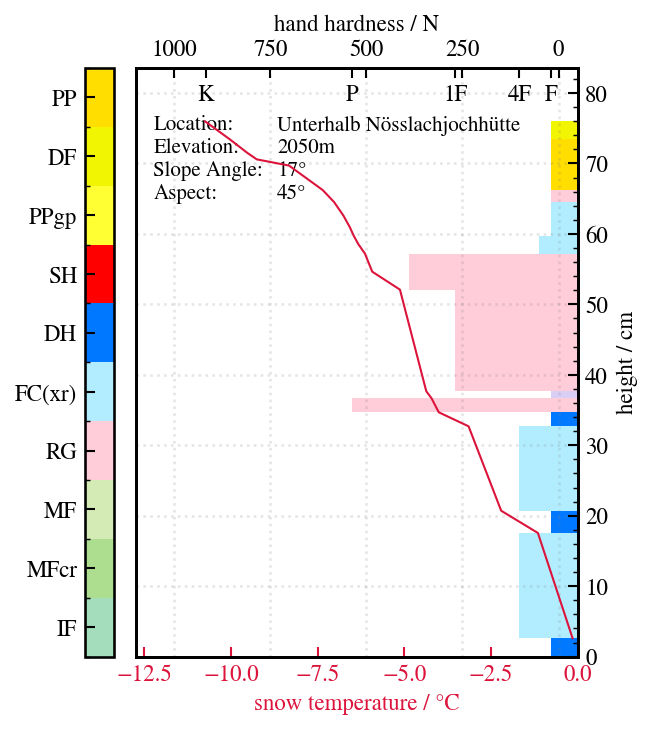

In [9]:
"""Plot single profile"""
datetime_str = "2024-12-22T23:00"
pro_plotter.single_profile(pro_path, DATETIME_STR=datetime_str, out_path=out_path)

In [ ]:
"""Apply Stephanie Mayer's RF model (calc Punstable)"""
importlib.reload(instability_rfm_mayer)
profs, meta = snowpro.read_pro(pro_path)
profs = instability_rfm_mayer.calc_punstable(profs)
profs[list(profs.keys())[-1]]['Punstable']

[i]  Stacking features for Punstable RF-model (Mayer et al., 2022): 0.009008169174194336s
[i]  RF-model prediction: 0.019554853439331055s


array([0.61792857, 0.20995833, 0.7145    , 0.16979167, 0.362625  ,
       0.08333333, 0.14475   , 0.08083333, 0.09083333, 0.10583333,
       0.2165    , 0.17125   , 0.19      , 0.43029167, 0.42220833,
       0.273625  , 0.30933333, 0.23120833, 0.14379167, 0.14379167,
       0.25179167, 0.18845833, 0.225125  , 0.293875  ,        nan])

In [ ]:
"""Load RF model of Stephanie Mayer"""
# feature_names = ['viscdefrate', 'rcflat', 'sphericity', 'grainsize', 'penetrationdepth','slab_rhogs']  
model  = joblib.load('./models/RF_instability_model.sav')